<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Data Discovery
</div>

In [1]:
import pandas as pd
import seaborn as sbs
import numpy as np
import matplotlib.pyplot as plt

### Read processed data

In [2]:
processed_data=[]
processed_data.append(pd.read_csv("../data/processed/preprocess_OA.csv"))
processed_data.append(pd.read_csv("../data/processed/preprocess_OEA.csv"))
processed_data.append(pd.read_csv("../data/processed/preprocess_OER.csv"))
processed_data.append(pd.read_csv("../data/processed/preprocess_QCL.csv"))
processed_data.append(pd.read_csv("../data/processed/preprocess_QV.csv"))

### Read the external content and merge with the processed data

In [3]:
external_data=[]
external_data.append(pd.read_csv("../data/external/area_code.csv"))
external_data.append(pd.read_csv("../data/external/domain_code.csv"))
external_data.append(pd.read_csv("../data/external/element_code.csv"))
external_data.append(pd.read_csv("../data/external/flag_des.csv"))
external_data.append(pd.read_csv("../data/external/indicator_code.csv"))
external_data.append(pd.read_csv("../data/external/item_code.csv"))
external_data.append(pd.read_csv("../data/external/source_code.csv"))

### With the data collected, and what we know about the data, we shall make questions

Question 1: What is the production value growth of every item, from 2000 to 2021?

### The QCL database is where we will analyze and get an answer

In [4]:
production=pd.merge(processed_data[3], external_data[2], how='left', on='Element Code')
production=pd.merge(production, external_data[5], how='left', on='Item Code')
display(production)

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Element,Item
0,QCL,237,5312,711,1961,ha,1000.00,E,NaN,Area harvested (ha),"Anise, badian, coriander, cumin, caraway, fenn..."
1,QCL,237,5419,711,1961,100 g/ha,7000.00,E,NaN,Yield (100 g/ha),"Anise, badian, coriander, cumin, caraway, fenn..."
2,QCL,237,5510,711,1961,t,700.00,E,NaN,Production (t),"Anise, badian, coriander, cumin, caraway, fenn..."
3,QCL,237,5312,711,1962,ha,1000.00,E,NaN,Area harvested (ha),"Anise, badian, coriander, cumin, caraway, fenn..."
4,QCL,237,5419,711,1962,100 g/ha,7000.00,E,NaN,Yield (100 g/ha),"Anise, badian, coriander, cumin, caraway, fenn..."
...,...,...,...,...,...,...,...,...,...,...,...
15065,QCL,237,5419,1735,2020,100 g/ha,170584.00,E,NaN,Yield (100 g/ha),Vegetables Primary
15066,QCL,237,5510,1735,2020,t,17006433.11,E,NaN,Production (t),Vegetables Primary
15067,QCL,237,5312,1735,2021,ha,1002974.00,E,NaN,Area harvested (ha),Vegetables Primary
15068,QCL,237,5419,1735,2021,100 g/ha,171731.00,E,NaN,Yield (100 g/ha),Vegetables Primary


### Now, we will take only the production value of the data between 2000 and 2021, with flag A of the grain items

In [5]:
production=production[production['Year'].between(2000, 2021)][production['Element']=='Production (t)']
production=production[production['Item'].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")][production['Value']!=0]
display(production)

C:\Users\admind\AppData\Local\Temp\ipykernel_46592\3006857044.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  production=production[production['Year'].between(2000, 2021)][production['Element']=='Production (t)']
C:\Users\admind\AppData\Local\Temp\ipykernel_46592\3006857044.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  production=production[production['Item'].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")][production['Value']!=0]


,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Element,Item
4684,QCL,237,5510,56,2000,t,2005900.00,A,NaN,Production (t),Maize (corn)
4687,QCL,237,5510,56,2001,t,2161700.00,A,NaN,Production (t),Maize (corn)
4690,QCL,237,5510,56,2002,t,2511200.00,A,NaN,Production (t),Maize (corn)
4693,QCL,237,5510,56,2003,t,3136300.00,A,NaN,Production (t),Maize (corn)
4696,QCL,237,5510,56,2004,t,3430900.00,A,NaN,Production (t),Maize (corn)
...,...,...,...,...,...,...,...,...,...,...,...
10154,QCL,237,5510,27,2017,t,42763682.38,A,NaN,Production (t),Rice
10157,QCL,237,5510,27,2018,t,44046249.56,A,NaN,Production (t),Rice
10160,QCL,237,5510,27,2019,t,43495487.58,A,NaN,Production (t),Rice
10163,QCL,237,5510,27,2020,t,42764999.76,A,NaN,Production (t),Rice


### Finally, for each element, calculate the growth rate starting from 2000, and draw a graph chart to show the growth process

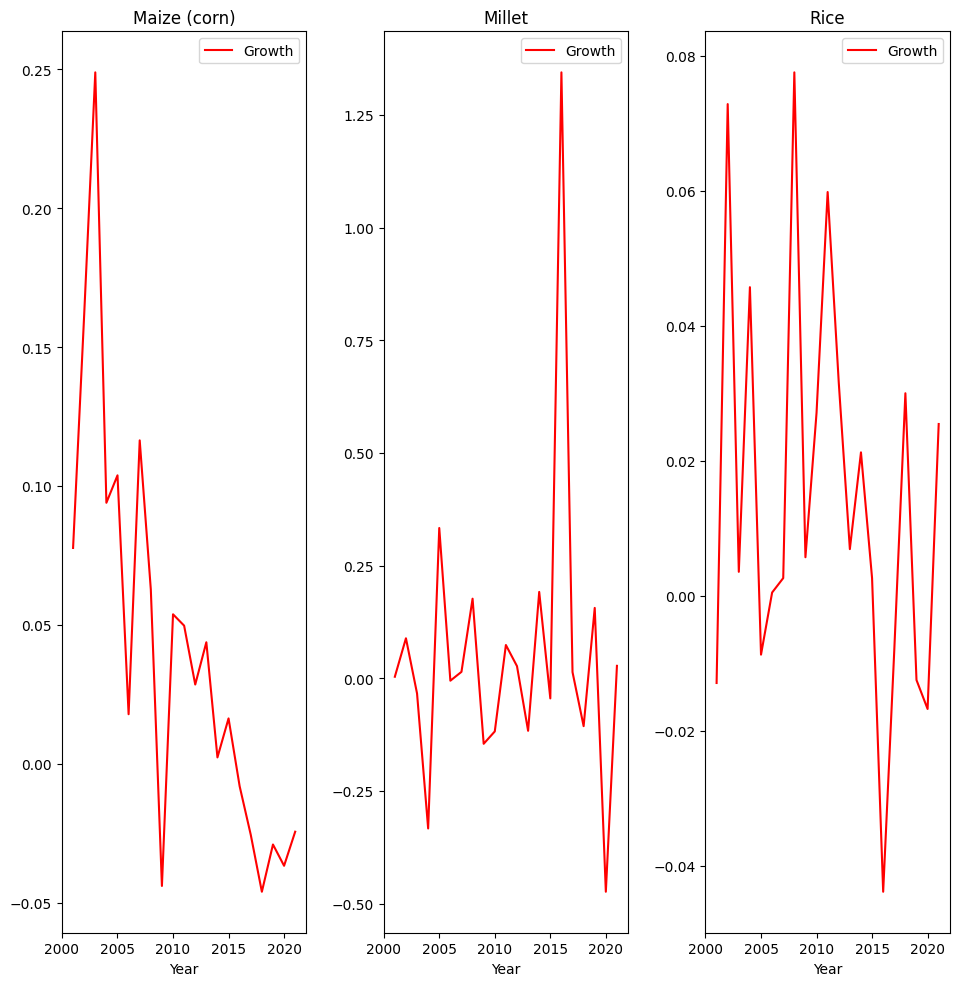

In [6]:
nrows=1
ncols=3
fig, axes=plt.subplots(nrows, ncols, figsize=(10, 10))
plt.tight_layout(pad=2.5, w_pad=2.5, h_pad=3)

i=0

for item in production['Item'].unique():
    try: 
        temp=production[production['Item']==item]
        pro=pd.DataFrame()
        pro["Growth"]=temp["Value"].pct_change()
        pro["Year"]=temp["Year"]

        pro.plot(x='Year', y='Growth', color='red', title=item, ax=axes[i])
        
    except ValueError:
        pass
    i=i+1
plt.show()

### Comment:
- The graph above demonstrates the growth rates of 3 grain items' production value, from 2000 to 2021. This is to show the changes of production rates between years, giving an insight and a general prediction 
- Maize (corn)
    - Has a very discontinous growth rate
    - Greatest growth rate: 25%, in 2003
    - Greatest decrease rate: 4%, in 2009
- Millet
    - Has a very discontinous growth rate
    - Greatest growth rate: 150%, in 2016
    - Greatest decrease rate: 45%, in 2020
- Rice
    - Has a very discontinous growth rate
    - Greatest growth rate: 7.5%, in 2008
    - Greatest decrease rate: 4%, in 2016
-   In conclusion: from 2000 to 2021: 
    -   Production of `Millet` increases dramatically (over 100%, 2016)
    -   `Millet` has the greatest decrease of production (45%, 2020)
    -   Expect for Area Harvested of `Millet`, which significantly (about 68.26%)

Question 2: What is the correlation between the elements of production for each item?

### Firstly, get all the data with A flag from 2000 to 2021, and choose Maize (corn), Rice, Sugarcane

In [7]:
production2=pd.merge(processed_data[3], external_data[2], how='left', on='Element Code')
production2=pd.merge(production2, external_data[5], how='left', on='Item Code')
production2=production2[production2['Year'].between(2000, 2021)][production2['Item'].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")][production2['Value']!=0]

display(production2)

C:\Users\admind\AppData\Local\Temp\ipykernel_46592\3916881463.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  production2=production2[production2['Year'].between(2000, 2021)][production2['Item'].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")][production2['Value']!=0]
C:\Users\admind\AppData\Local\Temp\ipykernel_46592\3916881463.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  production2=production2[production2['Year'].between(2000, 2021)][production2['Item'].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")][production2['Value']!=0]


,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Element,Item
4682,QCL,237,5312,56,2000,ha,730200.00,A,NaN,Area harvested (ha),Maize (corn)
4683,QCL,237,5419,56,2000,100 g/ha,27471.00,A,NaN,Yield (100 g/ha),Maize (corn)
4684,QCL,237,5510,56,2000,t,2005900.00,A,NaN,Production (t),Maize (corn)
4685,QCL,237,5312,56,2001,ha,729500.00,A,NaN,Area harvested (ha),Maize (corn)
4686,QCL,237,5419,56,2001,100 g/ha,29633.00,A,NaN,Yield (100 g/ha),Maize (corn)
...,...,...,...,...,...,...,...,...,...,...,...
10162,QCL,237,5419,27,2020,100 g/ha,59212.00,A,NaN,Yield (100 g/ha),Rice
10163,QCL,237,5510,27,2020,t,42764999.76,A,NaN,Production (t),Rice
10164,QCL,237,5312,27,2021,ha,7219797.00,A,NaN,Area harvested (ha),Rice
10165,QCL,237,5419,27,2021,100 g/ha,60740.00,A,NaN,Yield (100 g/ha),Rice


### For each Item dataframe, create a pivot table showing values of each element throughout the years
### With the pivot table, you can now create a heatmap showing correlation between each element

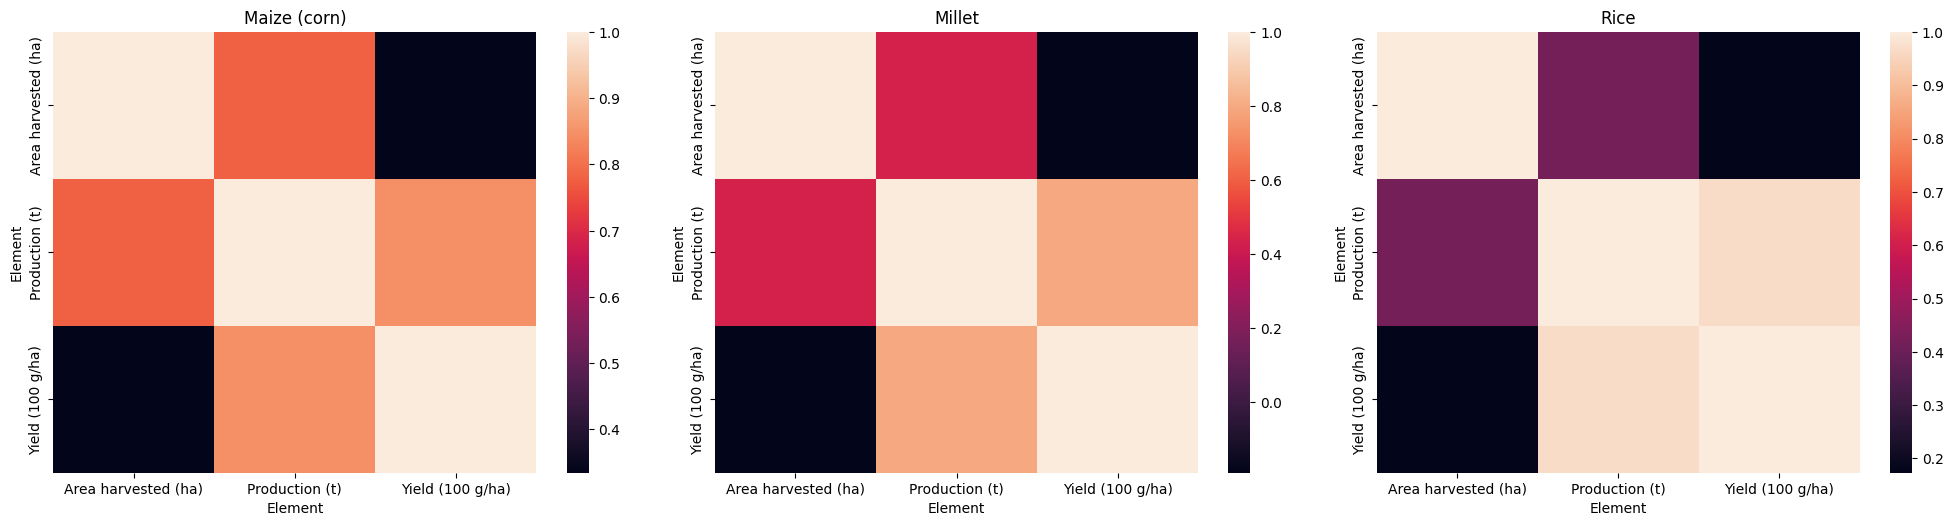

In [8]:
nrows=1
ncols=3

i=0
fig, axes=plt.subplots(nrows, ncols, figsize=(20, 5))
plt.tight_layout()
for item in production2['Item'].unique():
    temp=production2[production2['Item']==item]

    df=pd.pivot_table(temp, values='Value', index=['Domain Code', 'Area Code', 'Year'], columns=['Element'])

    sbs.heatmap(data=df.corr(), ax=axes[i]).set(title=item)
    i=i+1

### Comment
- The heatmap chart shows the correlation between each element of a certain item, giving us an insight to how these elements interact with each other to form a general formula calculating the values of them
- Maize (corn):
    - Greatest positive correlation: Yield (100 g/ha) and Production (t) (0.8)
    - Least positive correlation: Yield (100 g/ha) and Area Harvested (ha) (0.35)
- Millet:
    - Greatest positive correlation: Yield (100 g/ha) and Production (t) (0.7)
    - Least positive correlation: Production (t) and Area Harvested (ha) (0.4)
    - Greatest negative correlation: Yield (100 g/ha) and Area Harvested (ha) (-0.2)
- Rice:
    - Greatest positive correlation: Yield (100 g/ha) and Production (t) (0.9)
    - Least positive correlation: Yield (100 g/ha) and Area Harvested (ha) (0.18)

Question 4: What is the difference between workforce of 2 sexes?
By answering this, we will find out the allocation of gender workforce in agriculture of Vietnam from 2000 to 2021, and predict the allocation of gender in the future
### Here, the answer can be found in OA dataframe

In [9]:
sex_workforce=pd.merge(processed_data[0], external_data[2], how='left', on='Element Code')
sex_workforce=pd.merge(sex_workforce, external_data[5], how='left', on='Item Code')


### Let's get only from 2000 to 2021, only gender-related element

In [17]:
sex_workforce=sex_workforce[sex_workforce['Element'].str.contains("Male|Female")][(sex_workforce['Year']==2000) | (sex_workforce['Year']==2005) | (sex_workforce['Year']==2010) | (sex_workforce['Year']==2015) | (sex_workforce['Year']==2020)]
sex_workforce

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Element,Item
251,OA,237,512,3010,2000,1000 No,38652.066,X,NaN,Total Population - Male (1000 No),Population - Est. & Proj.
252,OA,237,513,3010,2000,1000 No,40349.076,X,NaN,Total Population - Female (1000 No),Population - Est. & Proj.
276,OA,237,512,3010,2005,1000 No,40824.111,X,NaN,Total Population - Male (1000 No),Population - Est. & Proj.
277,OA,237,513,3010,2005,1000 No,42317.983,X,NaN,Total Population - Female (1000 No),Population - Est. & Proj.
301,OA,237,512,3010,2010,1000 No,43048.310,X,NaN,Total Population - Male (1000 No),Population - Est. & Proj.
302,OA,237,513,3010,2010,1000 No,44362.702,X,NaN,Total Population - Female (1000 No),Population - Est. & Proj.
326,OA,237,512,3010,2015,1000 No,45481.510,X,NaN,Total Population - Male (1000 No),Population - Est. & Proj.
327,OA,237,513,3010,2015,1000 No,46709.887,X,NaN,Total Population - Female (1000 No),Population - Est. & Proj.
351,OA,237,512,3010,2020,1000 No,47726.158,X,NaN,Total Population - Male (1000 No),Population - Est. & Proj.
352,OA,237,513,3010,2020,1000 No,48922.527,X,NaN,Total Population - Female (1000 No),Population - Est. & Proj.


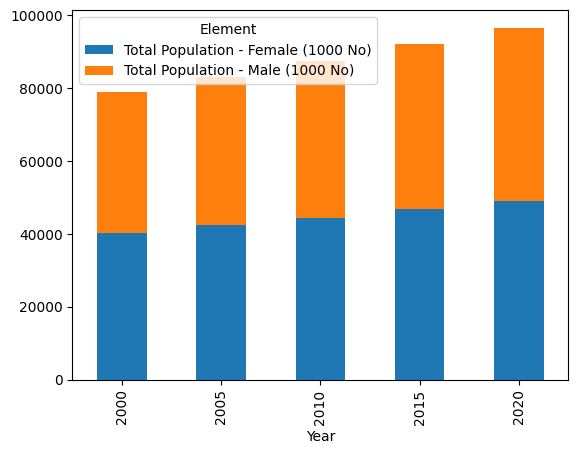

In [20]:
get=pd.pivot_table(sex_workforce, values='Value', index=['Year'], columns=['Element'])
ax=get.plot.bar(stacked=True)

## Comment:
- This stacked bar chart shows us the allocation of the sexes in workforce of Vietnamese agriculture. By doing so, we get an insight on how the gender allocation will occur in the future
- Conclusion:
    - The total number of workforce for both sexes increases gradually after 5 years
    - While the male workers increase in number, the female workers have a more significant increase over the year, from male being more than 50% of the workforce in 2000 to female slightly dominating the workforce in 2020